# Bank data analysis

The goal of your project is to create a robust classifier and use the data, where you will build a model that will recognize whether specific client will leave/unsubscribe the bank services.
Make feature engineering but also try differnet models in order to get as much accuracy as possible.




    

## Dataset Info

* CLIENTNUM
  - Client number. Unique identifier for the customer holding the account

* Attrition_Flag
  - Internal event (customer activity) variable - if the account is closed then 1 else 0

* Customer_Age
  - Demographic variable - Customer's Age in Years

* Gender
  - Demographic variable - M=Male, F=Female

* Dependent_count
  - Demographic variable - Number of dependents

* Education_Level
  - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)


* Marital_Status
  - Demographic variable - Married, Single, Divorced, Unknown

* Income_Category
  - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)


* Card_Category
  - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

* Months_on_book
  - Period of relationship with bank


* Total_Relationship_Count
  - Total no. of products held by the customer

* Months_Inactive_12_mon
  - No. of months inactive in the last 12 months

* Contacts_Count_12_mon
  - No. of Contacts in the last 12 months

* Credit_Limit
  - Credit Limit on the Credit Card

* Total_Revolving_Bal
  - Total Revolving Balance on the Credit Card

* Avg_Open_To_Buy
  - Open to Buy Credit Line (Average of last 12 months)

* Total_Amt_Chng_Q4_Q1
  - Change in Transaction Amount (Q4 over Q1)

* Total_Trans_Amt
  - Total Transaction Amount (Last 12 months)

* Total_Trans_Ct
  - Total Transaction Count (Last 12 months)

* Total_Ct_Chng_Q4_Q1
  - Change in Transaction Count (Q4 over Q1)

* Avg_Utilization_Ratio
  - Average Card Utilization Ratio




# Working Plan



1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

## 0. Read data, visualize, basic statistics, understand it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import roc_curve, plot_roc_curve, auc, RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
dataset = pd.read_csv('dataset_bank.csv')

In [3]:
dataset['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [4]:
dataset.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36.0,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46.0,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27.0,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36.0,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36.0,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


## 1. Data preprocessing, normalization, missing data, categorical data

In [5]:
# Which columns are numeric, which are category.

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


print("Numeric columns")
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        print(column)
print("----------------------------------")        
print("Category columns")        
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        print(column)

Numeric columns
CLIENTNUM
Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
----------------------------------
Category columns
Attrition_Flag
Gender
Education_Level
Marital_Status
Income_Category
Card_Category


In [6]:
# Check if there are missing data

for column in dataset.columns:
    if dataset[column].isnull().values.any():
        print(column)

In [7]:
dataset['Months_on_book'].unique()

array([ 3.90000000e+01,  4.40000000e+01,  3.60000000e+01,  3.40000000e+01,
        2.10000000e+01,  4.60000000e+01,  2.70000000e+01,  3.10000000e+01,
        5.40000000e+01,  3.00000000e+01,  4.80000000e+01,  3.70000000e+01,
        5.60000000e+01,  4.20000000e+01,  4.90000000e+01,  3.30000000e+01,
        2.80000000e+01,  3.80000000e+01,  4.10000000e+01,  4.30000000e+01,
        4.50000000e+01,  5.20000000e+01,  4.00000000e+01,  5.00000000e+01,
        3.50000000e+01,  4.70000000e+01,  3.20000000e+01,  2.00000000e+01,
        2.90000000e+01,  2.50000000e+01,  5.30000000e+01,  2.40000000e+01,
        5.50000000e+01,  2.30000000e+01,  2.20000000e+01,  2.60000000e+01,
        2.14748365e+09,  1.30000000e+01,  5.10000000e+01,  1.90000000e+01,
        1.50000000e+01,  1.70000000e+01,  1.80000000e+01, -2.14748365e+09,
        1.60000000e+01,  1.40000000e+01,  3.21000000e+11])

In [8]:
dataset['Months_on_book'] = dataset.Months_on_book.replace({-2147483647: 'None', 
                                                              2147483647: 'None', 
                                                              3.21E+11: 'None'})

In [9]:
dataset['Months_on_book'].unique()

array([39.0, 44.0, 36.0, 34.0, 21.0, 46.0, 27.0, 31.0, 54.0, 30.0, 48.0,
       37.0, 56.0, 42.0, 49.0, 33.0, 28.0, 38.0, 41.0, 43.0, 45.0, 52.0,
       40.0, 50.0, 35.0, 47.0, 32.0, 20.0, 29.0, 25.0, 53.0, 24.0, 55.0,
       23.0, 22.0, 26.0, 'None', 13.0, 51.0, 19.0, 15.0, 17.0, 18.0, 16.0,
       14.0], dtype=object)

In [10]:
dataset['Months_on_book'].value_counts()

36.0    2417
37.0     358
34.0     351
38.0     347
39.0     341
40.0     333
31.0     318
35.0     314
33.0     304
30.0     300
41.0     297
32.0     289
28.0     275
43.0     273
42.0     271
29.0     241
44.0     230
45.0     227
27.0     206
46.0     197
26.0     186
47.0     171
25.0     165
48.0     162
24.0     160
49.0     141
23.0     116
22.0     105
56.0     103
50.0      96
21.0      83
51.0      80
53.0      78
20.0      74
13.0      70
19.0      63
52.0      62
18.0      58
54.0      53
None      52
55.0      42
17.0      39
15.0      34
16.0      29
14.0      16
Name: Months_on_book, dtype: int64

In [11]:
dataset['Months_on_book'] = dataset['Months_on_book'].replace('None', np.nan)

In [12]:
from sklearn.impute import KNNImputer

transformer = KNNImputer(n_neighbors=2)

columns = ['Months_on_book']
dataset[columns] = transformer.fit_transform(dataset[columns])

In [13]:
dataset['Months_on_book'].unique()

array([39.        , 44.        , 36.        , 34.        , 21.        ,
       46.        , 27.        , 31.        , 54.        , 30.        ,
       48.        , 37.        , 56.        , 42.        , 49.        ,
       33.        , 28.        , 38.        , 41.        , 43.        ,
       45.        , 52.        , 40.        , 50.        , 35.        ,
       47.        , 32.        , 20.        , 29.        , 25.        ,
       53.        , 24.        , 55.        , 23.        , 22.        ,
       26.        , 35.92903226, 13.        , 51.        , 19.        ,
       15.        , 17.        , 18.        , 16.        , 14.        ])

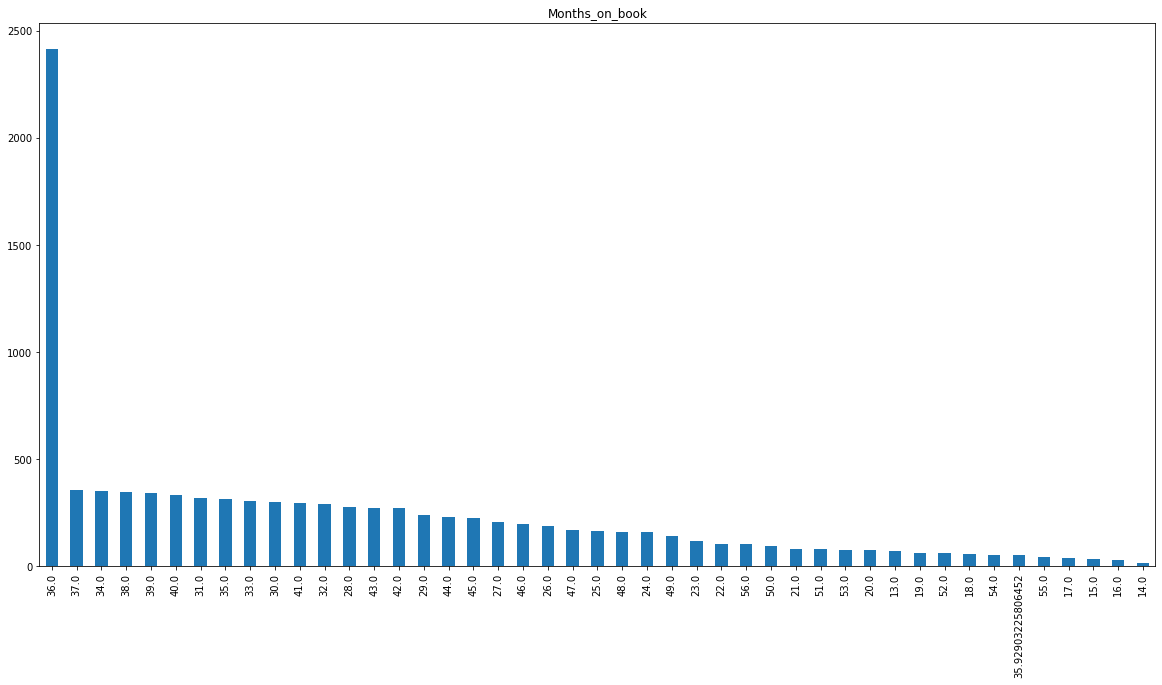

In [14]:
dataset['Months_on_book'].value_counts().plot.bar(figsize=(20,10),title='Months_on_book')

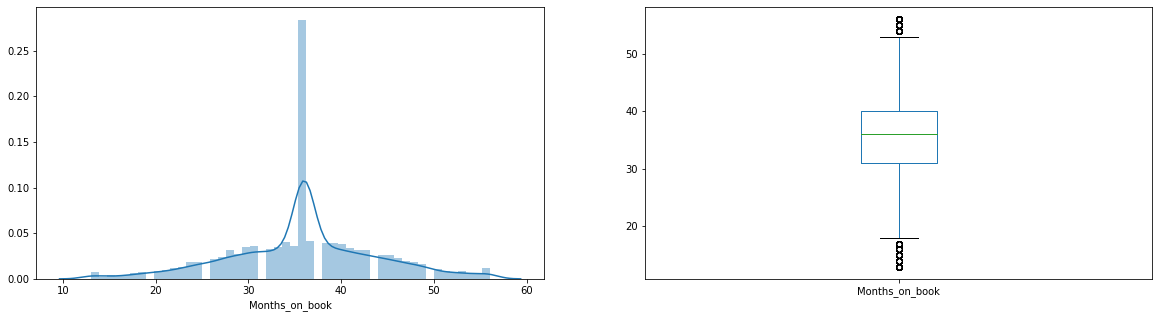

In [15]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Months_on_book'], label='Months_on_book')

plt.subplot(122)
dataset['Months_on_book'].plot(kind='box', label="Months_on_book")

In [16]:
dataset['Months_on_book'].value_counts()

36.000000    2417
37.000000     358
34.000000     351
38.000000     347
39.000000     341
40.000000     333
31.000000     318
35.000000     314
33.000000     304
30.000000     300
41.000000     297
32.000000     289
28.000000     275
43.000000     273
42.000000     271
29.000000     241
44.000000     230
45.000000     227
27.000000     206
46.000000     197
26.000000     186
47.000000     171
25.000000     165
48.000000     162
24.000000     160
49.000000     141
23.000000     116
22.000000     105
56.000000     103
50.000000      96
21.000000      83
51.000000      80
53.000000      78
20.000000      74
13.000000      70
19.000000      63
52.000000      62
18.000000      58
54.000000      53
35.929032      52
55.000000      42
17.000000      39
15.000000      34
16.000000      29
14.000000      16
Name: Months_on_book, dtype: int64

In [17]:
# Conclusion: According to the plots and numbers, the outliers of the feature Months_on book would be: 13, 14, 15, 16, 17, 
# 18, 19, 52, 54 and 55. Number of months 35.929 is not taken as an outlier because is a product of KNNImputer. As a 
# rounded number it is 36, and it is the majority of data.

In [18]:
# Remove ID values

dataset.drop(['CLIENTNUM'], inplace=True, axis='columns')

In [19]:
dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [20]:
dataset['Customer_Age'].unique()

array([45, 49, 51, 40, 44, 32, 37, 48, 42, 65, 56, 35, 57, 41, 61, 47, 62,
       54, 59, 63, 53, 58, 55, 66, 50, 38, 46, 52, 39, 43, 64, 68, 67, 60,
       73, 70, 36, 34, 33, 26, 31, 29, 30, 28, 27], dtype=int64)

In [21]:
dataset['Credit_Limit'].unique()

array([12691.,  8256.,  3418., ...,  5409.,  5281., 10388.])

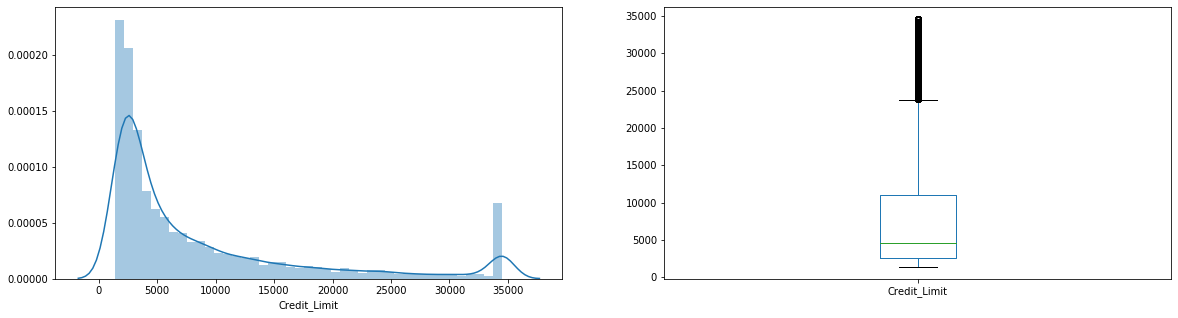

In [22]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Credit_Limit'], label='Credit_Limit')

plt.subplot(122)
dataset['Credit_Limit'].plot(kind='box', label="Credit_Limit")

### Log transform to feature Credit_Limit

In [23]:
dataset = dataset.assign(Credit_Limit_norm = np.log(dataset['Credit_Limit']+0.1))

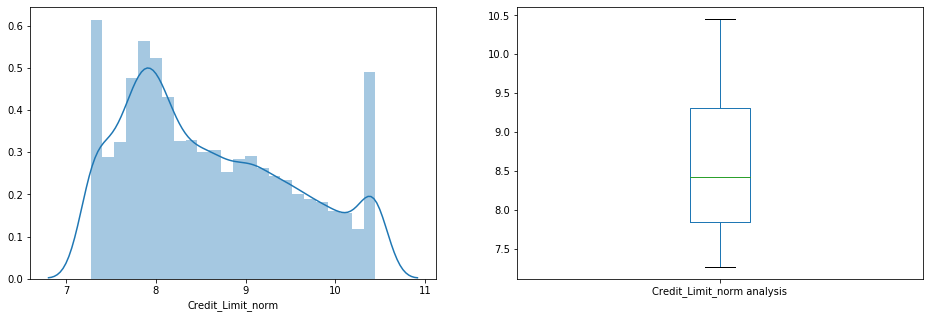

In [24]:
plt.figure()

plt.subplot(121) # nrows, ncols, index
sns.distplot(dataset['Credit_Limit_norm'],label="Credit_Limit_norm")

plt.subplot(122)
dataset['Credit_Limit_norm'].plot(kind='box',
                                  figsize=(16,5),
                                  label="Credit_Limit_norm analysis")

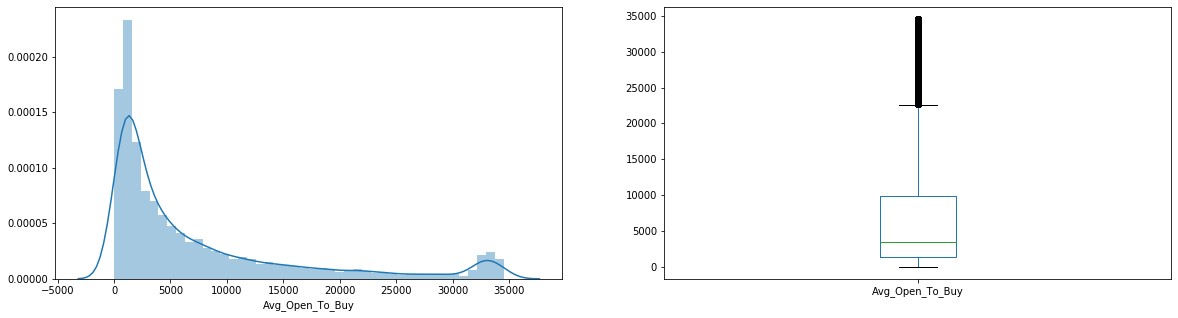

In [25]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Avg_Open_To_Buy'], label='Avg_Open_To_Buy')

plt.subplot(122)
dataset['Avg_Open_To_Buy'].plot(kind='box', label="Avg_Open_To_Buy")

### Log transform to feature Avg_Open_To_Buy

In [26]:
dataset = dataset.assign(Avg_Open_To_Buy_norm = np.log(dataset['Avg_Open_To_Buy']+0.1))

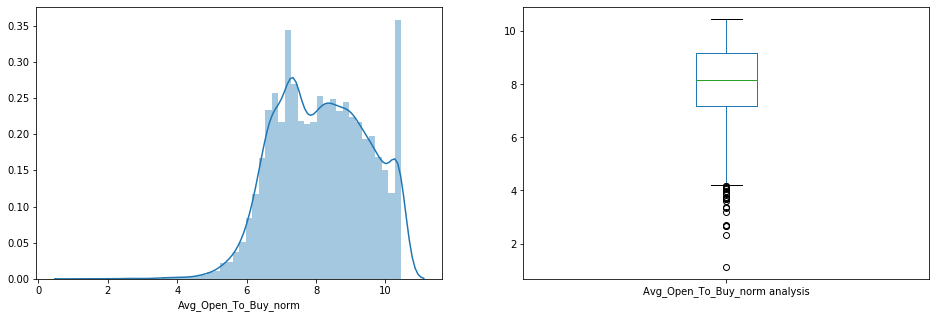

In [27]:
plt.figure()

plt.subplot(121) # nrows, ncols, index
sns.distplot(dataset['Avg_Open_To_Buy_norm'],label="Avg_Open_To_Buy_norm")

plt.subplot(122)
dataset['Avg_Open_To_Buy_norm'].plot(kind='box',
                                  figsize=(16,5),
                                  label="Avg_Open_To_Buy_norm analysis")

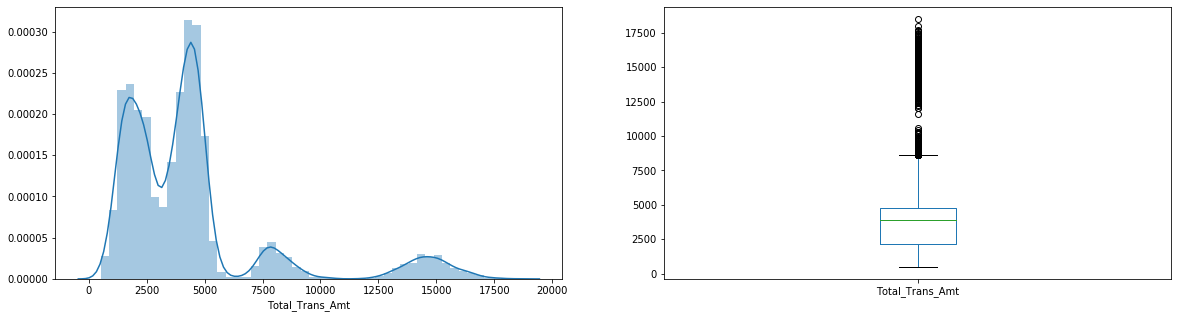

In [28]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Total_Trans_Amt'], label='Total_Trans_Amt')

plt.subplot(122)
dataset['Total_Trans_Amt'].plot(kind='box', label="Total_Trans_Amt")

### Log transform to feature Total_Trans_Amt

In [29]:
dataset = dataset.assign(Total_Trans_Amt_norm = np.log(dataset['Total_Trans_Amt']+0.1))

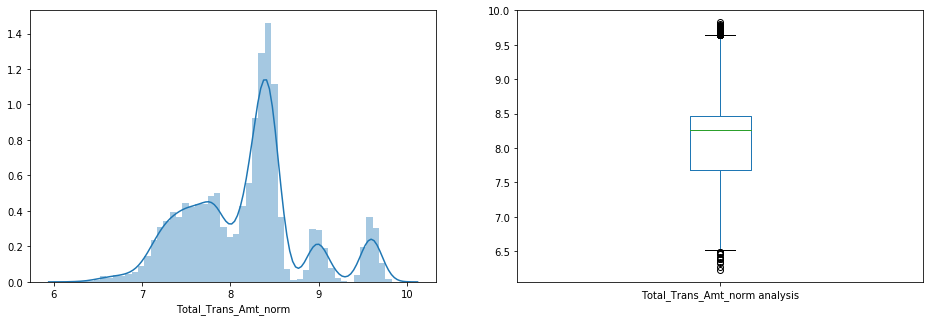

In [30]:
plt.figure()

plt.subplot(121) # nrows, ncols, index
sns.distplot(dataset['Total_Trans_Amt_norm'],label="Total_Trans_Amt_norm")

plt.subplot(122)
dataset['Total_Trans_Amt_norm'].plot(kind='box',
                                  figsize=(16,5),
                                  label="Total_Trans_Amt_norm analysis")

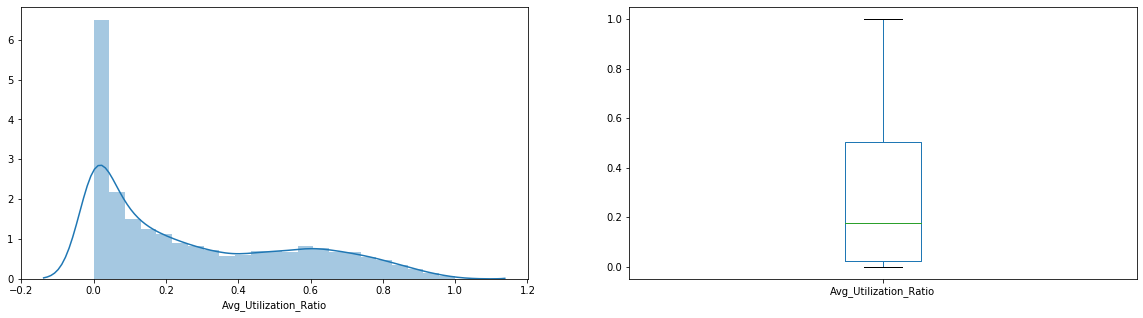

In [31]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.distplot(dataset['Avg_Utilization_Ratio'], label='Avg_Utilization_Ratio')

plt.subplot(122)
dataset['Avg_Utilization_Ratio'].plot(kind='box', label="Avg_Utilization_Ratio")

### Log transform to feature Avg_Utilization_Ratio 

In [32]:
dataset = dataset.assign(Avg_Utilization_Ratio_norm = np.log(dataset['Avg_Utilization_Ratio']+0.1))

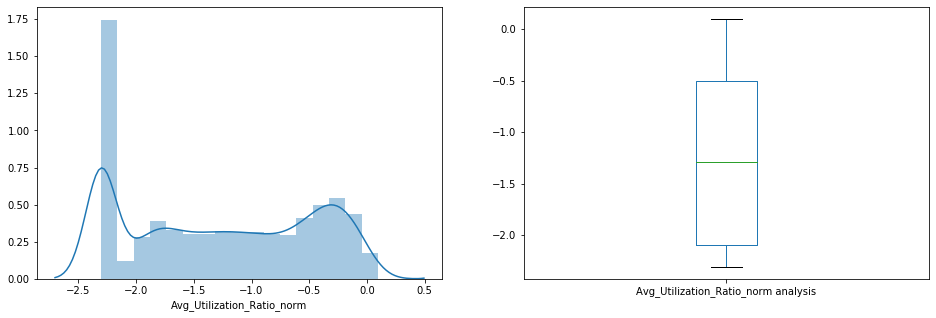

In [33]:
plt.figure()

plt.subplot(121) # nrows, ncols, index
sns.distplot(dataset['Avg_Utilization_Ratio_norm'],label="Avg_Utilization_Ratio_norm")

plt.subplot(122)
dataset['Avg_Utilization_Ratio_norm'].plot(kind='box',
                                  figsize=(16,5),
                                  label="Avg_Utilization_Ratio_norm analysis")

In [34]:
dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_norm,Avg_Open_To_Buy_norm,Total_Trans_Amt_norm,Avg_Utilization_Ratio_norm
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,5,...,11914.0,1.335,1144,42,1.625,0.061,9.448656,9.385478,7.042374,-1.826351
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,...,7392.0,1.541,1291,33,3.714,0.105,9.018708,8.908167,7.163250,-1.584745
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,...,3418.0,2.594,1887,20,2.333,0.000,8.136840,8.136840,7.542797,-2.302585
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,3,...,796.0,1.405,1171,20,2.333,0.760,8.105640,6.679725,7.065699,-0.150823
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,...,4716.0,2.175,816,28,2.500,0.000,8.458737,8.458737,6.704537,-2.302585


In [35]:
from sklearn.preprocessing import StandardScaler


def scale(dataset, columns):
    dataset_new = dataset.copy()
    standard_scaller = StandardScaler() 
    dataset_new[columns] = standard_scaller.fit_transform(dataset_new[columns])

    
    return dataset_new

dataset_scaled = scale(dataset, columns=['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 
                                         'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 
                                         'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 
                                         'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 
                                         'Avg_Utilization_Ratio', 'Credit_Limit_norm', 'Avg_Open_To_Buy_norm', 
                                         'Total_Trans_Amt_norm', 'Avg_Utilization_Ratio_norm'])

In [36]:
dataset_scaled.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_norm,Avg_Open_To_Buy_norm,Total_Trans_Amt_norm,Avg_Utilization_Ratio_norm
0,Existing Customer,-0.165406,M,0.503368,High School,Married,$60K - $80K,Blue,0.384548,0.763943,...,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,0.905230,0.931619,-1.715272,-0.689031
1,Existing Customer,0.333570,F,2.043199,Graduate,Single,Less than $40K,Blue,1.010652,1.407306,...,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,0.444754,0.567603,-1.530560,-0.384984
2,Existing Customer,0.583058,M,0.503368,Graduate,Married,$80K - $120K,Blue,0.008887,0.120579,...,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,-0.499728,-0.020640,-0.950569,-1.288345
3,Existing Customer,-0.789126,F,1.273283,High School,Unknown,Less than $40K,Blue,-0.241555,-0.522785,...,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,-0.533144,-1.131891,-1.679629,1.419526
4,Existing Customer,-0.789126,M,0.503368,Uneducated,Married,$60K - $80K,Blue,-1.869423,0.763943,...,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,-0.154975,0.224851,-2.231525,-1.288345


In [37]:
# List the categorical features and their number of categories

from pandas.api.types import is_string_dtype

for i in dataset_scaled.columns:
    if is_string_dtype(dataset_scaled[i]):
        print(i, len(dataset_scaled[i].unique()))

Attrition_Flag 2
Gender 2
Education_Level 7
Marital_Status 4
Income_Category 6
Card_Category 4


In [38]:
from sklearn.preprocessing import LabelEncoder

def label_encoding_notordinal(dataset, columns):
    dataset_ = dataset.copy()
    transformer = LabelEncoder()
    for column in columns:
        dataset_[column]  = transformer.fit_transform(dataset_[column])
    return dataset_

In [39]:
dataset_label_encoded = label_encoding_notordinal(dataset_scaled, columns=['Education_Level', 'Income_Category', 
                                                                           'Attrition_Flag'])

In [40]:
dataset_label_encoded.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_norm,Avg_Open_To_Buy_norm,Total_Trans_Amt_norm,Avg_Utilization_Ratio_norm
0,1,-0.165406,M,0.503368,3,Married,2,Blue,0.384548,0.763943,...,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,0.905230,0.931619,-1.715272,-0.689031
1,1,0.333570,F,2.043199,2,Single,4,Blue,1.010652,1.407306,...,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,0.444754,0.567603,-1.530560,-0.384984
2,1,0.583058,M,0.503368,2,Married,3,Blue,0.008887,0.120579,...,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,-0.499728,-0.020640,-0.950569,-1.288345
3,1,-0.789126,F,1.273283,3,Unknown,4,Blue,-0.241555,-0.522785,...,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,-0.533144,-1.131891,-1.679629,1.419526
4,1,-0.789126,M,0.503368,5,Married,2,Blue,-1.869423,0.763943,...,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,-0.154975,0.224851,-2.231525,-1.288345


In [41]:
def one_hot_encoding(dataset, columns):
    dataset_new = dataset.copy()
    data_dummies =  pd.get_dummies(dataset[columns])
    dataset_new = pd.concat([dataset_new, data_dummies],  axis='columns')
    dataset_new.drop(columns, axis='columns', inplace=True)

    return dataset_new

In [42]:
dataset_one_hot_encoded = one_hot_encoding(dataset_label_encoded, columns=['Gender', 'Marital_Status', 'Card_Category'])

In [43]:
dataset_one_hot_encoded.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,-0.165406,0.503368,3,2,0.384548,0.763943,-1.327136,0.492404,0.446622,...,0,1,0,1,0,0,1,0,0,0
1,1,0.333570,2.043199,2,4,1.010652,1.407306,-1.327136,-0.411616,-0.041367,...,1,0,0,0,1,0,1,0,0,0
2,1,0.583058,0.503368,2,3,0.008887,0.120579,-1.327136,-2.219655,-0.573698,...,0,1,0,1,0,0,1,0,0,0
3,1,-0.789126,1.273283,3,4,-0.241555,-0.522785,1.641478,-1.315636,-0.585251,...,1,0,0,0,0,1,1,0,0,0
4,1,-0.789126,0.503368,5,2,-1.869423,0.763943,-1.327136,-2.219655,-0.430877,...,0,1,0,1,0,0,1,0,0,0


## 2. Feature Anaysis, Extraction & Selection
(you may need to perform feature selection after creating default models and compare to them)

## 3. Classification models
- classical classification models
- deep neural networks

In [44]:
# Make train/test split : with train(70%), test(30%) # 80% so 20% da bide!

from sklearn.model_selection import train_test_split

X = dataset_one_hot_encoded.drop(['Attrition_Flag'], axis=1)
y = dataset_one_hot_encoded['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [45]:
X.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.165406,0.503368,3,2,0.384548,0.763943,-1.327136,0.492404,0.446622,-0.473422,...,0,1,0,1,0,0,1,0,0,0
1,0.333570,2.043199,2,4,1.010652,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,...,1,0,0,0,1,0,1,0,0,0
2,0.583058,0.503368,2,3,0.008887,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,...,0,1,0,1,0,0,1,0,0,0
3,-0.789126,1.273283,3,4,-0.241555,-0.522785,1.641478,-1.315636,-0.585251,1.661686,...,1,0,0,0,0,1,1,0,0,0
4,-0.789126,0.503368,5,2,-1.869423,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,...,0,1,0,1,0,0,1,0,0,0


In [46]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition_Flag, dtype: int32

### Naive Bayes

In [47]:
%%time
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_test, y_test)

print('The accuracy on the training subset: {:.3f}'.format(gnb.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(gnb.score(X_test, y_test)))

The accuracy on the training subset: 0.879
The accuracy on the test subset: 0.885
Wall time: 22 ms


In [48]:
from sklearn.metrics import classification_report

y_pred_gnb = gnb.predict(X_test)
y_proba_gnb = gnb.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.64      0.57      0.60       309
           1       0.92      0.94      0.93      1717

    accuracy                           0.88      2026
   macro avg       0.78      0.76      0.77      2026
weighted avg       0.88      0.88      0.88      2026



In [49]:
confusion_matrix(y_test, y_pred_gnb)

array([[ 176,  133],
       [ 101, 1616]], dtype=int64)

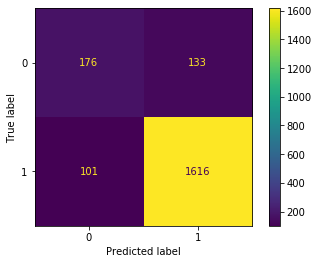

In [50]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb, labels=gnb.classes_)
confus_gnb_disp = ConfusionMatrixDisplay(confusion_matrix=cm_gnb,
                                         display_labels=gnb.classes_)
confus_gnb_disp.plot()

In [51]:
naive_bayes_results = roc_curve(y_test, y_pred_gnb)

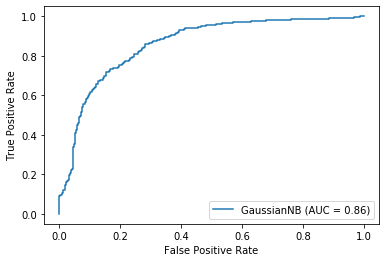

In [52]:
plot_roc_curve(gnb, X_test, y_test)

### SVM

In [94]:
%%time
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

svm = SVC(gamma='auto', kernel='rbf', C=15)
clf_svm = CalibratedClassifierCV(svm)
clf_svm.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(clf_svm.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(clf_svm.score(X_test, y_test)))

The accuracy on the training subset: 0.981
The accuracy on the test subset: 0.942
Wall time: 6.59 s


In [95]:
y_pred_svm = clf_svm.predict(X_test)
y_proba_svm = clf_svm.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       309
           1       0.96      0.98      0.97      1717

    accuracy                           0.94      2026
   macro avg       0.90      0.87      0.88      2026
weighted avg       0.94      0.94      0.94      2026



In [55]:
confusion_matrix(y_test, y_pred_svm)

array([[ 233,   76],
       [  41, 1676]], dtype=int64)

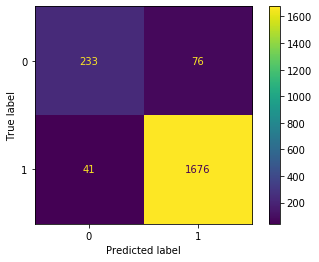

In [56]:
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=clf_svm.classes_)
confus_svm_disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                                         display_labels=clf_svm.classes_)
confus_svm_disp.plot() 

In [57]:
svm_results = roc_curve(y_test, y_pred_svm)

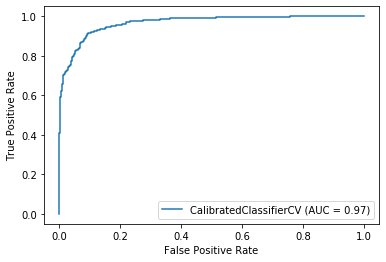

In [58]:
plot_roc_curve(clf_svm, X_test, y_test)

### Decision Tree

In [59]:
%%time
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

print('Accuracy on the training subset ', (tree.score(X_train, y_train)))
print('Accuracy on the test subset:', (tree.score(X_test, y_test)))

Accuracy on the training subset  1.0
Accuracy on the test subset: 0.9338598223099703
Wall time: 116 ms


In [60]:
y_pred_tree = tree.predict(X_test)
y_proba_tree = tree.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       309
           1       0.96      0.96      0.96      1717

    accuracy                           0.93      2026
   macro avg       0.87      0.87      0.87      2026
weighted avg       0.93      0.93      0.93      2026



In [61]:
confusion_matrix(y_test, y_pred_tree)

array([[ 240,   69],
       [  65, 1652]], dtype=int64)

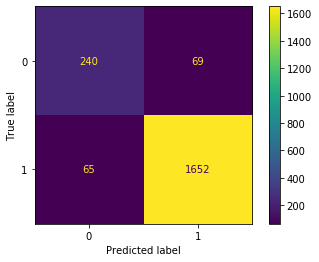

In [62]:
cm_tree = confusion_matrix(y_test, y_pred_tree, labels=tree.classes_)
confus_tree_disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,
                                          display_labels=tree.classes_)
confus_tree_disp.plot() 

In [63]:
decision_tree_results = roc_curve(y_test, y_pred_tree)

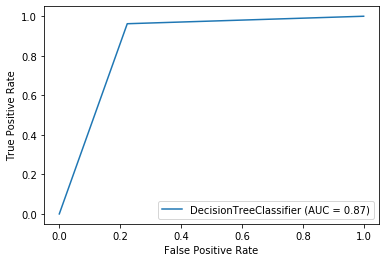

In [64]:
plot_roc_curve(tree, X_test, y_test)

### Random Forest

In [65]:
print(X_train.shape)

(8101, 30)


In [66]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf_tree = RandomForestClassifier(n_jobs=-1,
                              max_depth=10,
                              n_estimators=100,
                              min_samples_leaf=4, 
                              max_leaf_nodes=150, 
                              criterion='entropy',
                              max_features=0.5,
                              random_state=0)
rf_tree.fit(X_train, y_train)


print('The accuracy on the training subset: {:.3f}'.format(rf_tree.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(rf_tree.score(X_test, y_test)))

The accuracy on the training subset: 0.985
The accuracy on the test subset: 0.968
Wall time: 976 ms


In [67]:
y_pred_rf_tree = rf_tree.predict(X_test)
y_proba_rf_tree = rf_tree.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_rf_tree))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       309
           1       0.97      0.99      0.98      1717

    accuracy                           0.97      2026
   macro avg       0.95      0.92      0.94      2026
weighted avg       0.97      0.97      0.97      2026



In [68]:
confusion_matrix(y_test, y_pred_rf_tree)

array([[ 263,   46],
       [  19, 1698]], dtype=int64)

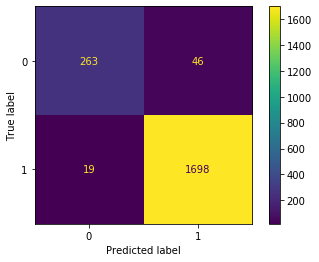

In [69]:
cm_rf_tree = confusion_matrix(y_test, y_pred_rf_tree, labels=rf_tree.classes_)
confus_rf_tree_disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_tree,
                                             display_labels=rf_tree.classes_)
confus_rf_tree_disp.plot()

In [70]:
random_forest_results = roc_curve(y_test, y_pred_rf_tree)

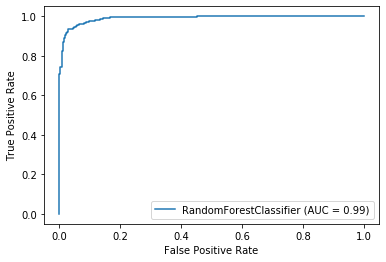

In [71]:
plot_roc_curve(rf_tree, X_test, y_test)

### KNN

In [72]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

print("Accuracy on training data : ", knn.score(X_train,y_train))
print("Accuracy on test data : ", knn.score(X_test,y_test))

Accuracy on training data :  0.9258116281940502
Accuracy on test data :  0.910167818361303
Wall time: 4.15 s


In [73]:
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.51      0.64       309
           1       0.92      0.98      0.95      1717

    accuracy                           0.91      2026
   macro avg       0.88      0.75      0.79      2026
weighted avg       0.91      0.91      0.90      2026



In [74]:
confusion_matrix(y_test, y_pred_knn)

array([[ 159,  150],
       [  32, 1685]], dtype=int64)

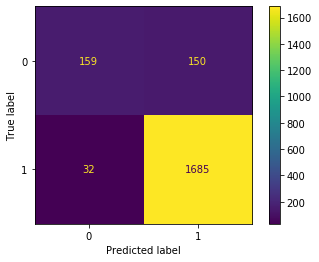

In [75]:
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
confus_knn_disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                                         display_labels=knn.classes_)
confus_knn_disp.plot()

In [76]:
knn_results = roc_curve(y_test, y_pred_knn)

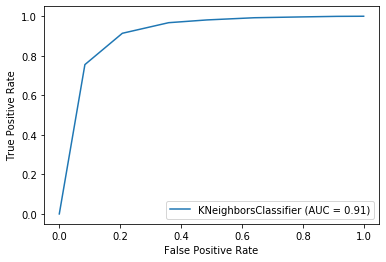

In [77]:
plot_roc_curve(knn, X_test, y_test)

## XGBoost

In [78]:
#!pip3 install xgboost

In [79]:
import xgboost as xgb

In [80]:
%%time
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

print("Accuracy on training data : ", xgb.score(X_train,y_train))
print("Accuracy on test data : ", xgb.score(X_test,y_test))

Accuracy on training data :  1.0
Accuracy on test data :  0.9743336623889437
Wall time: 394 ms


In [81]:
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       309
           1       0.98      0.99      0.98      1717

    accuracy                           0.97      2026
   macro avg       0.96      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026



In [82]:
confusion_matrix(y_test, y_pred_xgb)

array([[ 274,   35],
       [  17, 1700]], dtype=int64)

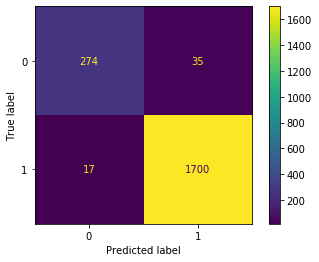

In [83]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=xgb.classes_)
confus_xgb_disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,
                                               display_labels=xgb.classes_)
confus_xgb_disp.plot()

In [84]:
xgb_results = roc_curve(y_test, y_pred_xgb)

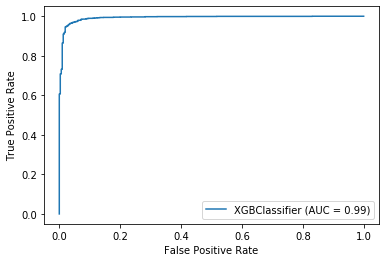

In [85]:
plot_roc_curve(xgb, X_test, y_test)

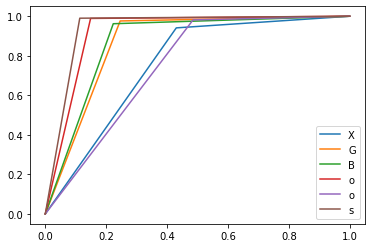

In [86]:
from sklearn.metrics import roc_curve, plot_roc_curve, auc, RocCurveDisplay
gnb

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_gnb)
roc_auc = auc(fpr_gnb, tpr_gnb)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr_svm, tpr_svm)

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_tree)
roc_auc = auc(fpr_tree, tpr_tree)

fpr_rf_tree, tpr_rf_tree, _ = roc_curve(y_test, y_pred_rf_tree)
roc_auc = auc(fpr_rf_tree, tpr_rf_tree)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr_knn, tpr_knn)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr_xgb, tpr_xgb)

plt.plot(fpr_gnb,tpr_gnb)
plt.legend("Naive Bayes")
plt.plot(fpr_svm, tpr_svm) 
plt.legend("SVM")
plt.plot(fpr_tree, tpr_tree) 
plt.legend("Decision Tree")
plt.plot(fpr_rf_tree, tpr_rf_tree) 
plt.legend("Random Forest")
plt.plot(fpr_knn, tpr_knn) 
plt.legend("KNN")
plt.plot(fpr_xgb, tpr_xgb) 
plt.legend("XGBoost")

plt.show()

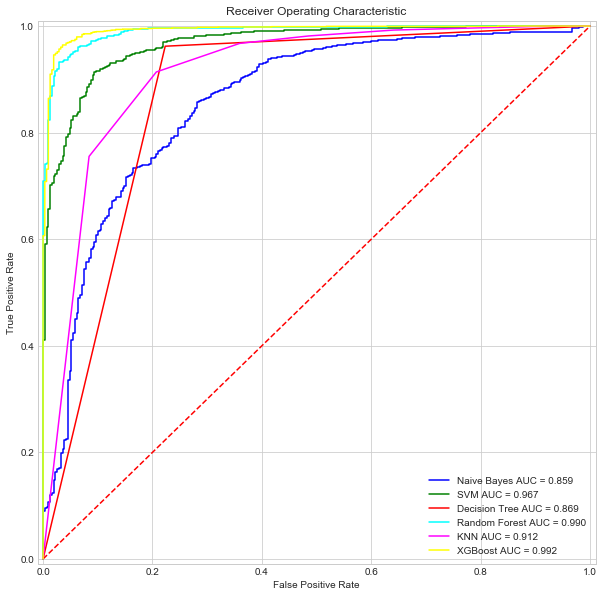

In [87]:
# drug primer

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = [
    'Naive Bayes', 
    'SVM', 
    'Decision Tree', 
    'Random Forest', 
    'KNN', 
    'XGBoost'
]
probs = [
    y_proba_gnb,
    y_proba_svm,
    y_proba_tree,
    y_proba_rf_tree,
    y_proba_knn,
    y_proba_xgb
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
    'black'
]

plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.3f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()

## 4. Evaluation and comparisons, various metrics

### Correlation matrix

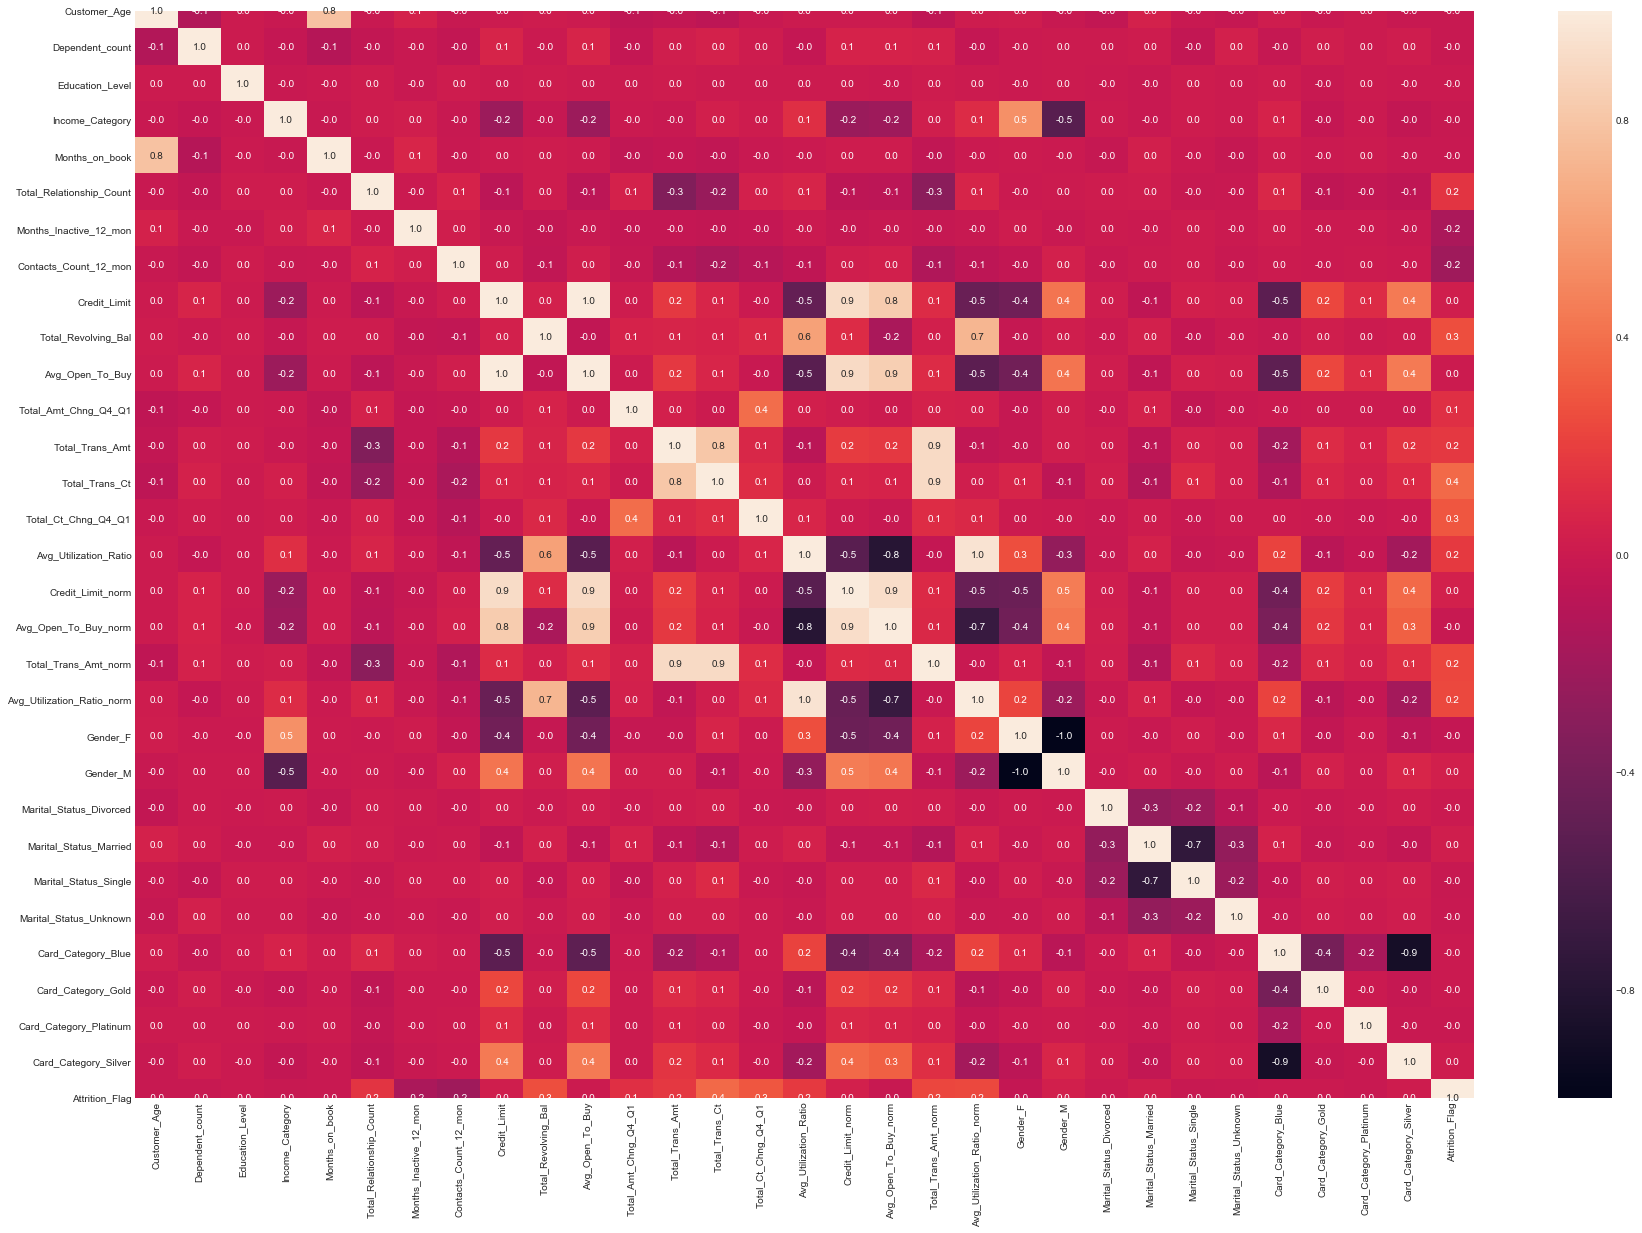

In [89]:
# import pandas as pd

# X = dataset_one_hot_encoded.drop(['Attrition_Flag'], axis=1)
# y = dataset_one_hot_encoded['Attrition_Flag']

result = pd.concat([X, y], axis=1)
correlation_train=result.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_train, annot=True, fmt='.1f')
plt.show()

In [90]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

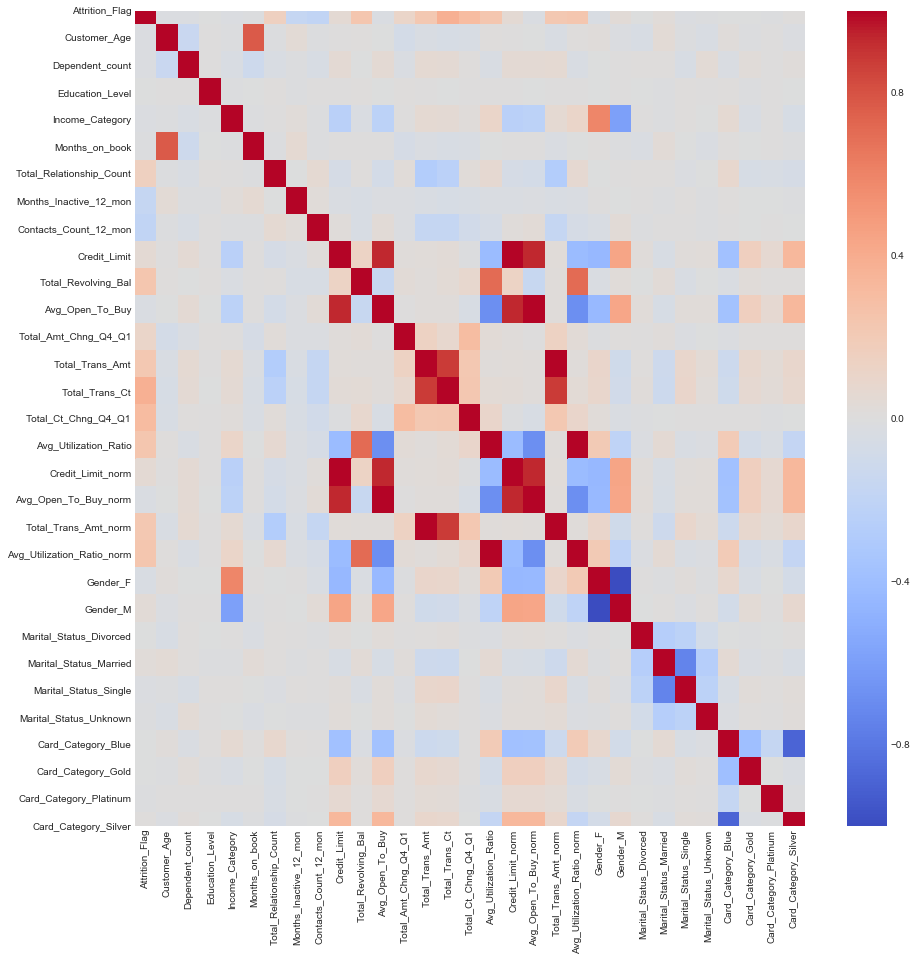

In [91]:
drawheatmap(dataset_one_hot_encoded)

In [92]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae_gnb = mean_absolute_error(y_test, y_pred_gnb)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mae_rf_tree = mean_absolute_error(y_test, y_pred_rf_tree)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

#construct the comparison table
data = {'Metric':  ['MAE'],
        'Naive Bayes': [mae_gnb],
        'SVM': [mae_svm],
        'Decision Tree': [mae_tree],
        'Random Forest': [mae_rf_tree],
        'KNN': [mae_knn],
        'XGBoost': [mae_xgb],
        }

comparison = pd.DataFrame (data, columns = ['Metric', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest', 'KNN', 
                                            'XGBoost'])
comparison

,Metric,Naive Bayes,SVM,Decision Tree,Random Forest,KNN,XGBoost
0,MAE,0.115499,0.057749,0.06614,0.032083,0.089832,0.025666


## 5. Hyperparameter Optimization

## Random Search

## Grid search

## 6. Final evaluations and comparisons
- the best model - analyze it in details, evaluate it with different train/test splits. Is it robust enough

## 7. Discussion, Concusions, Future improvements
- which features are the most important
- how will you explain the model to the management of the bank
- how much benefit/improvement should the bank expect